# Joining Data

#### Task 1: Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [286]:
# First, let's import sobre libraries:

import requests
import os
import re
from IPython.display import JSON 
import pandas as pd
import numpy as np
import seaborn as sns # for visualization
import matplotlib.pyplot as plt # for visualization
%matplotlib inline
sns.set(color_codes = True)

In [203]:
# In order to join the data accordinlly, I will remain with the sample of the City Bikes extracted during the yelp_foursquare_EDA notebook.
# From 90 stations retrieved from the City Bikes API (population), 10% of them were randomly retrieved as our sample.

df_city_bikes = pd.read_csv("df_city_bikes_recife_network_sample.csv")
df_fsq_and_yelp = pd.read_csv("df_fsq_and_yelp_parsed_and_grouped_by_name.csv")

df_city_bikes_recife_network_with_fsq_and_yelp = pd.merge(df_city_bikes, df_fsq_and_yelp, how = "outer")


In [204]:
df_city_bikes_recife_network_with_fsq_and_yelp.to_csv("df_city_bikes_recife_network_with_fsq_and_yelp.csv", index = False)


In [205]:
# First, let's get the information about the data frame:

df_city_bikes_recife_network_with_fsq_and_yelp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        9 non-null      float64
 1   Id                9 non-null      object 
 2   Uid               9 non-null      float64
 3   Name              200 non-null    object 
 4   Address           9 non-null      object 
 5   Empty Slots       9 non-null      float64
 6   Free Bikes        9 non-null      float64
 7   Last Updated      9 non-null      float64
 8   Payment           9 non-null      object 
 9   Payment Terminal  9 non-null      object 
 10  Renting Bikes     9 non-null      float64
 11  Returning Bikes   9 non-null      float64
 12  Latitude          9 non-null      float64
 13  Longitude         9 non-null      float64
 14  Timestamp         9 non-null      object 
 15  Distance          75 non-null     float64
 16  Latitude_x        75 non-null     float64
 1

This means that most of our dataset has non-null values so this is a good start as we have merged different data frames created from different APIs: for example, as we have 9 city bikes stations and they don't have any null values, the null values that appeared were related to the joining data process as new rows were added to the merged data frame.

So, before starting to filling out missing values with a specific parameter, let's make sure this information is accurate by checking for missing data:

In [206]:
# Checking for missing data:

df_city_bikes_recife_network_with_fsq_and_yelp.isnull().sum() / len(df_city_bikes_recife_network_with_fsq_and_yelp)

Unnamed: 0          0.955
Id                  0.955
Uid                 0.955
Name                0.000
Address             0.955
Empty Slots         0.955
Free Bikes          0.955
Last Updated        0.955
Payment             0.955
Payment Terminal    0.955
Renting Bikes       0.955
Returning Bikes     0.955
Latitude            0.955
Longitude           0.955
Timestamp           0.955
Distance            0.625
Latitude_x          0.625
Longitude_x         0.625
Latitude_y          0.370
Longitude_y         0.370
Rating              0.370
Review Count        0.370
dtype: float64

In [207]:
# Now, let's explore the first 3 rows of our data frame:

df_city_bikes_recife_network_with_fsq_and_yelp.head()

,Unnamed: 0,Id,Uid,Name,Address,Empty Slots,Free Bikes,Last Updated,Payment,Payment Terminal,...,Latitude,Longitude,Timestamp,Distance,Latitude_x,Longitude_x,Latitude_y,Longitude_y,Rating,Review Count
0,0.0,3a12e401773eb68091d8f135f716b15e,56.0,56 - R. Bernardino Soares da Silva,"Rua Bernardino Soares da Silva, em frente ao n...",10.0,1.0,1.663718e+09,"['key', 'transitcard', 'phone']",False,...,-8.044389,-34.890618,2022-09-21T00:01:38.258000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1842dd19423c073fd56bb24ef5e2aa6a,75.0,75 - Alberto Lundgren,"Av Ministro Marcos Freire, na calçada oposto a...",13.0,1.0,1.663718e+09,"['key', 'transitcard', 'phone']",False,...,-8.002349,-34.839632,2022-09-21T00:01:38.304000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,978255d1c42445aa729cb0c1ede70ad4,61.0,61 - Segundo Jardim,"Av. Boa Viagem, oposto ao 1590, baia de estaci...",21.0,6.0,1.663718e+09,"['key', 'transitcard', 'creditcard', 'phone']",True,...,-8.105086,-34.886842,2022-09-21T00:01:38.283000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,a4a51d19c9891371fbe9fd990401f7d1,23.0,23 - SESC Santo Amaro,"Praça do Campo Santo, oposto ao SESC / esquina...",17.0,2.0,1.663718e+09,"['key', 'transitcard', 'phone']",False,...,-8.049770,-34.882830,2022-09-21T00:01:38.249000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,d14ac50aad45f09df440c92114d3309e,4.0,4 - Boulevard Rio Branco,"Av. Rio Branco, entre a Rua do Apolo e Rua da ...",11.0,12.0,1.663718e+09,"['key', 'transitcard', 'creditcard', 'phone']",True,...,-8.062496,-34.872956,2022-09-21T00:01:38.251000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [208]:
# Let's explore our last 5 rows of our data frame:

df_city_bikes_recife_network_with_fsq_and_yelp.tail()

,Unnamed: 0,Id,Uid,Name,Address,Empty Slots,Free Bikes,Last Updated,Payment,Payment Terminal,...,Latitude,Longitude,Timestamp,Distance,Latitude_x,Longitude_x,Latitude_y,Longitude_y,Rating,Review Count
195,NaN,NaN,NaN,Wiella Bistrô,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-8.100730,-34.887611,4.5,3.0
196,NaN,NaN,NaN,Winner Sports Bar,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-8.047380,-34.893791,4.5,5.0
197,NaN,NaN,NaN,Yantai Express,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-8.032550,-34.904148,3.0,6.0
198,NaN,NaN,NaN,ZEN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-8.044134,-34.892897,3.5,13.0
199,NaN,NaN,NaN,Ça Va Bistrô,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-8.095550,-34.884041,4.5,4.0


In [209]:
# Now, let's check the data types to see if it is needed any cleaning of some information:

df_city_bikes_recife_network_with_fsq_and_yelp.dtypes

Unnamed: 0          float64
Id                   object
Uid                 float64
Name                 object
Address              object
Empty Slots         float64
Free Bikes          float64
Last Updated        float64
Payment              object
Payment Terminal     object
Renting Bikes       float64
Returning Bikes     float64
Latitude            float64
Longitude           float64
Timestamp            object
Distance            float64
Latitude_x          float64
Longitude_x         float64
Latitude_y          float64
Longitude_y         float64
Rating              float64
Review Count        float64
dtype: object

As we can see, most of the data is stored as an *object* or *float type*. In order to plot some of the information and visualize them, we would need to convert the information we would like to analyze to an integer. Due to that, let's change the data types of only the parameters we will use in our analysis. And, in order to do that, let's state our hypothesis:

- H0 = There isn't a relationship between the variable free bikes and the quality of POIs in the area.
- Ha = There is a relationship between the variable free bikes and the quality of POIs in the area.

Therefore, the parameters selected to be changed are: 

- Uid (the identification of the station);
- *Empty slots*, *free bikes*, *renting bikes* and *returning bikes* variables as we are going to use them together to designate the station capacity of providing bikes to their users;
- *Review count* as this is also relevant to understand the pois retrieved by the APIs.


In [210]:
# But, before doing this conversion, it is noted that there are some non-finite values as our conversion raised this type of error: "Cannot convert non-finite values (NA or inf) to integer".
# So, we need to replace non-finite values first before moving forward with our conversion of data types.
# Let's replace them in a column with the number 0 as this is going to indicate us a lack of station information. 
# After that, we can change the data type to an int with the .astype() method (int8 was chosen because it uses less memory):

column_uid = df_city_bikes_recife_network_with_fsq_and_yelp['Uid']
column_uid = column_uid.where(np.isfinite(column_uid), 0).astype(np.int8)
df_city_bikes_recife_network_with_fsq_and_yelp['Uid'] = column_uid
display(df_city_bikes_recife_network_with_fsq_and_yelp)


/opt/anaconda3/envs/base_env/lib/python3.8/site-packages/IPython/lib/pretty.py:778: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
/opt/anaconda3/envs/base_env/lib/python3.8/site-packages/IPython/core/formatters.py:342: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  return method()


,Unnamed: 0,Id,Uid,Name,Address,Empty Slots,Free Bikes,Last Updated,Payment,Payment Terminal,...,Latitude,Longitude,Timestamp,Distance,Latitude_x,Longitude_x,Latitude_y,Longitude_y,Rating,Review Count
0,0.0,3a12e401773eb68091d8f135f716b15e,56,56 - R. Bernardino Soares da Silva,"Rua Bernardino Soares da Silva, em frente ao n...",10.0,1.0,1.663718e+09,"['key', 'transitcard', 'phone']",False,...,-8.044389,-34.890618,2022-09-21T00:01:38.258000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1842dd19423c073fd56bb24ef5e2aa6a,75,75 - Alberto Lundgren,"Av Ministro Marcos Freire, na calçada oposto a...",13.0,1.0,1.663718e+09,"['key', 'transitcard', 'phone']",False,...,-8.002349,-34.839632,2022-09-21T00:01:38.304000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,978255d1c42445aa729cb0c1ede70ad4,61,61 - Segundo Jardim,"Av. Boa Viagem, oposto ao 1590, baia de estaci...",21.0,6.0,1.663718e+09,"['key', 'transitcard', 'creditcard', 'phone']",True,...,-8.105086,-34.886842,2022-09-21T00:01:38.283000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,a4a51d19c9891371fbe9fd990401f7d1,23,23 - SESC Santo Amaro,"Praça do Campo Santo, oposto ao SESC / esquina...",17.0,2.0,1.663718e+09,"['key', 'transitcard', 'phone']",False,...,-8.049770,-34.882830,2022-09-21T00:01:38.249000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,d14ac50aad45f09df440c92114d3309e,4,4 - Boulevard Rio Branco,"Av. Rio Branco, entre a Rua do Apolo e Rua da ...",11.0,12.0,1.663718e+09,"['key', 'transitcard', 'creditcard', 'phone']",True,...,-8.062496,-34.872956,2022-09-21T00:01:38.251000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,NaN,NaN,0,Wiella Bistrô,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-8.100730,-34.887611,4.5,3.0
196,NaN,NaN,0,Winner Sports Bar,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-8.047380,-34.893791,4.5,5.0
197,NaN,NaN,0,Yantai Express,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-8.032550,-34.904148,3.0,6.0
198,NaN,NaN,0,ZEN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-8.044134,-34.892897,3.5,13.0


In [211]:
# Let's do now with the others using the same criteria: 0 as an indicator that there aren't no more empty sots available:

# column_empty_slots_initial = df_city_bikes_recife_network_with_fsq_and_yelp['Empty Slots']
# column_empty_slots_final = column_empty_slots.where(np.isfinite(column_empty_slots_initial), 0).astype(np.int8)
# df_city_bikes_recife_network_with_fsq_and_yelp['Empty Slots'] = column_empty_slots_final
# display(df_city_bikes_recife_network_with_fsq_and_yelp)


In [212]:
# 0 as an indicator that there aren't no more free bikes to be rent:

column_free_bikes_initial = df_city_bikes_recife_network_with_fsq_and_yelp['Free Bikes']
column_free_bikes_final = column_free_bikes_initial.where(np.isfinite(column_free_bikes_initial), 0).astype(np.int8)
df_city_bikes_recife_network_with_fsq_and_yelp['Free Bikes'] = column_free_bikes_final
# display(df_city_bikes_recife_network_with_fsq_and_yelp)


In [213]:
# 0 as an indicator that there aren't no more renting bikes:

column_renting_bikes_initial = df_city_bikes_recife_network_with_fsq_and_yelp['Renting Bikes']
column_renting_bikes_final = column_renting_bikes_initial.where(np.isfinite(column_renting_bikes_initial), 0).astype(np.int8)
df_city_bikes_recife_network_with_fsq_and_yelp['Renting Bikes'] = column_renting_bikes_final
# display(df_city_bikes_recife_network_with_fsq_and_yelp)


In [214]:
# 0 as an indicator that there aren't no more returning bikes:

column_returning_bikes_initial = df_city_bikes_recife_network_with_fsq_and_yelp['Returning Bikes']
column_returning_bikes_final = column_returning_bikes_initial.where(np.isfinite(column_returning_bikes_initial), 0).astype(np.int8)
df_city_bikes_recife_network_with_fsq_and_yelp['Returning Bikes'] = column_returning_bikes_final
# display(df_city_bikes_recife_network_with_fsq_and_yelp)


In [215]:
print(type(df_city_bikes_recife_network_with_fsq_and_yelp))

<class 'pandas.core.frame.DataFrame'>


In [216]:
# Also, let's use also the number 0 as an indicator that there are no review counts for a specific POI:

column_review_count_initial = df_city_bikes_recife_network_with_fsq_and_yelp['Review Count']
# print(column_review_count)
column_review_count_final = column_review_count_initial.where(np.isfinite(column_review_count_initial), 0).astype(np.int8)
df_city_bikes_recife_network_with_fsq_and_yelp['Review Count'] = column_review_count_final
print(df_city_bikes_recife_network_with_fsq_and_yelp)


     Unnamed: 0                                Id  Uid  \
0           0.0  3a12e401773eb68091d8f135f716b15e   56   
1           1.0  1842dd19423c073fd56bb24ef5e2aa6a   75   
2           2.0  978255d1c42445aa729cb0c1ede70ad4   61   
3           3.0  a4a51d19c9891371fbe9fd990401f7d1   23   
4           4.0  d14ac50aad45f09df440c92114d3309e    4   
..          ...                               ...  ...   
195         NaN                               NaN    0   
196         NaN                               NaN    0   
197         NaN                               NaN    0   
198         NaN                               NaN    0   
199         NaN                               NaN    0   

                                   Name  \
0    56 - R. Bernardino Soares da Silva   
1                 75 - Alberto Lundgren   
2                   61 - Segundo Jardim   
3                 23 - SESC Santo Amaro   
4              4 - Boulevard Rio Branco   
..                                  ...   
19

/var/folders/zt/gl7xtkgj7238nsqq03s_q7840000gn/T/ipykernel_38263/785103324.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  print(df_city_bikes_recife_network_with_fsq_and_yelp)


In [217]:
# Finally, let's check to see if the cleaning and casting data type worked with our selected parameters: 

df_city_bikes_recife_network_with_fsq_and_yelp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        9 non-null      float64
 1   Id                9 non-null      object 
 2   Uid               200 non-null    int8   
 3   Name              200 non-null    object 
 4   Address           9 non-null      object 
 5   Empty Slots       9 non-null      float64
 6   Free Bikes        200 non-null    int8   
 7   Last Updated      9 non-null      float64
 8   Payment           9 non-null      object 
 9   Payment Terminal  9 non-null      object 
 10  Renting Bikes     200 non-null    int8   
 11  Returning Bikes   200 non-null    int8   
 12  Latitude          9 non-null      float64
 13  Longitude         9 non-null      float64
 14  Timestamp         9 non-null      object 
 15  Distance          75 non-null     float64
 16  Latitude_x        75 non-null     float64
 1

In [218]:
# Below, more columns are being deleted:

df_city_bikes_recife_network_with_fsq_and_yelp.drop(columns='Last Updated', inplace=True)

df_city_bikes_recife_network_with_fsq_and_yelp.drop(columns='Timestamp', inplace=True)

df_city_bikes_recife_network_with_fsq_and_yelp.drop(columns='Payment', inplace=True)

df_city_bikes_recife_network_with_fsq_and_yelp.drop(columns='Payment Terminal', inplace=True)
print(df_city_bikes_recife_network_with_fsq_and_yelp)


     Unnamed: 0                                Id  Uid  \
0           0.0  3a12e401773eb68091d8f135f716b15e   56   
1           1.0  1842dd19423c073fd56bb24ef5e2aa6a   75   
2           2.0  978255d1c42445aa729cb0c1ede70ad4   61   
3           3.0  a4a51d19c9891371fbe9fd990401f7d1   23   
4           4.0  d14ac50aad45f09df440c92114d3309e    4   
..          ...                               ...  ...   
195         NaN                               NaN    0   
196         NaN                               NaN    0   
197         NaN                               NaN    0   
198         NaN                               NaN    0   
199         NaN                               NaN    0   

                                   Name  \
0    56 - R. Bernardino Soares da Silva   
1                 75 - Alberto Lundgren   
2                   61 - Segundo Jardim   
3                 23 - SESC Santo Amaro   
4              4 - Boulevard Rio Branco   
..                                  ...   
19

In [219]:
# As my data frame is still very big, let's check its shape to see how much of this information can still be dropped or cleaned.

df_city_bikes_recife_network_with_fsq_and_yelp.shape
df_city_bikes_recife_network_with_fsq_and_yelp.describe

<bound method NDFrame.describe of      Unnamed: 0                                Id  Uid  \
0           0.0  3a12e401773eb68091d8f135f716b15e   56   
1           1.0  1842dd19423c073fd56bb24ef5e2aa6a   75   
2           2.0  978255d1c42445aa729cb0c1ede70ad4   61   
3           3.0  a4a51d19c9891371fbe9fd990401f7d1   23   
4           4.0  d14ac50aad45f09df440c92114d3309e    4   
..          ...                               ...  ...   
195         NaN                               NaN    0   
196         NaN                               NaN    0   
197         NaN                               NaN    0   
198         NaN                               NaN    0   
199         NaN                               NaN    0   

                                   Name  \
0    56 - R. Bernardino Soares da Silva   
1                 75 - Alberto Lundgren   
2                   61 - Segundo Jardim   
3                 23 - SESC Santo Amaro   
4              4 - Boulevard Rio Branco   
..         

In [220]:
# Now, let's drop one more column called "distance" and leave only the ones related to latitude and longitude:

df_city_bikes_recife_network_with_fsq_and_yelp.drop(columns='Address', inplace=True)
print(df_city_bikes_recife_network_with_fsq_and_yelp)

     Unnamed: 0                                Id  Uid  \
0           0.0  3a12e401773eb68091d8f135f716b15e   56   
1           1.0  1842dd19423c073fd56bb24ef5e2aa6a   75   
2           2.0  978255d1c42445aa729cb0c1ede70ad4   61   
3           3.0  a4a51d19c9891371fbe9fd990401f7d1   23   
4           4.0  d14ac50aad45f09df440c92114d3309e    4   
..          ...                               ...  ...   
195         NaN                               NaN    0   
196         NaN                               NaN    0   
197         NaN                               NaN    0   
198         NaN                               NaN    0   
199         NaN                               NaN    0   

                                   Name  Empty Slots  Free Bikes  \
0    56 - R. Bernardino Soares da Silva         10.0           1   
1                 75 - Alberto Lundgren         13.0           1   
2                   61 - Segundo Jardim         21.0           6   
3                 23 - SESC San

In [226]:
# And the id column as this one doesn't mean anything to the data:

df_city_bikes_recife_network_with_fsq_and_yelp.drop(columns='Id', inplace=True)

In [222]:
# Let's save our changes into a new .csv file to visualize it better before doing more EDA:

df_city_bikes_recife_network_with_fsq_and_yelp.to_csv("df_city_bikes_recife_network_with_fsq_and_yelp.csv", index=False)


In [223]:
# Now, let's merge the latitude and longitude columns with the .fill() na method and drop them out afterwards:

df_city_bikes_recife_network_with_fsq_and_yelp['Latitude'] = df_city_bikes_recife_network_with_fsq_and_yelp['Latitude_x'].fillna(df_city_bikes_recife_network_with_fsq_and_yelp['Latitude_y'])
df_city_bikes_recife_network_with_fsq_and_yelp.drop(columns=['Latitude_x', 'Latitude_y'], inplace=True)


In [224]:
df_city_bikes_recife_network_with_fsq_and_yelp['Longitude'] = df_city_bikes_recife_network_with_fsq_and_yelp['Longitude_x'].fillna(df_city_bikes_recife_network_with_fsq_and_yelp['Longitude_y'])
df_city_bikes_recife_network_with_fsq_and_yelp.drop(columns=['Longitude_x', 'Longitude_y'], inplace=True)


In [227]:
df_city_bikes_recife_network_with_fsq_and_yelp.to_csv("df_city_bikes_recife_network_with_fsq_and_yelp.csv", index=False)

In [228]:
# Finally, let's fill with 0 the rest of the columns with null values (such as latitude, longitude, distance and ratings):

df_city_bikes_recife_network_with_fsq_and_yelp.fillna(0, inplace=True)
print(df_city_bikes_recife_network_with_fsq_and_yelp)

     Unnamed: 0  Uid                                Name  Empty Slots  \
0           0.0   56  56 - R. Bernardino Soares da Silva         10.0   
1           1.0   75               75 - Alberto Lundgren         13.0   
2           2.0   61                 61 - Segundo Jardim         21.0   
3           3.0   23               23 - SESC Santo Amaro         17.0   
4           4.0    4            4 - Boulevard Rio Branco         11.0   
..          ...  ...                                 ...          ...   
195         0.0    0                       Wiella Bistrô          0.0   
196         0.0    0                   Winner Sports Bar          0.0   
197         0.0    0                      Yantai Express          0.0   
198         0.0    0                                 ZEN          0.0   
199         0.0    0                        Ça Va Bistrô          0.0   

     Free Bikes  Renting Bikes  Returning Bikes  Latitude  Longitude  \
0             1              1                1  0.

In [229]:
# Finally, I found that the column labeled "distance" retreived from foursquare doesn't give me much information because there is no reference. 
# So, let's drop it:

df_city_bikes_recife_network_with_fsq_and_yelp.drop(columns='Distance', inplace=True)
print(df_city_bikes_recife_network_with_fsq_and_yelp)


     Unnamed: 0  Uid                                Name  Empty Slots  \
0           0.0   56  56 - R. Bernardino Soares da Silva         10.0   
1           1.0   75               75 - Alberto Lundgren         13.0   
2           2.0   61                 61 - Segundo Jardim         21.0   
3           3.0   23               23 - SESC Santo Amaro         17.0   
4           4.0    4            4 - Boulevard Rio Branco         11.0   
..          ...  ...                                 ...          ...   
195         0.0    0                       Wiella Bistrô          0.0   
196         0.0    0                   Winner Sports Bar          0.0   
197         0.0    0                      Yantai Express          0.0   
198         0.0    0                                 ZEN          0.0   
199         0.0    0                        Ça Va Bistrô          0.0   

     Free Bikes  Renting Bikes  Returning Bikes  Latitude  Longitude  Rating  \
0             1              1             

Finally, we have a joined dataframe more structured to be analyzed with only 200 rows and 11 columns.


In [233]:
# And, let's drop the column unnamed:

# df_city_bikes_recife_network_with_fsq_and_yelp.drop(columns="Unnamed: 0", inplace = True)

In [234]:
print(df_city_bikes_recife_network_with_fsq_and_yelp)

     Uid                                Name  Empty Slots  Free Bikes  \
0     56  56 - R. Bernardino Soares da Silva         10.0           1   
1     75               75 - Alberto Lundgren         13.0           1   
2     61                 61 - Segundo Jardim         21.0           6   
3     23               23 - SESC Santo Amaro         17.0           2   
4      4            4 - Boulevard Rio Branco         11.0          12   
..   ...                                 ...          ...         ...   
195    0                       Wiella Bistrô          0.0           0   
196    0                   Winner Sports Bar          0.0           0   
197    0                      Yantai Express          0.0           0   
198    0                                 ZEN          0.0           0   
199    0                        Ça Va Bistrô          0.0           0   

     Renting Bikes  Returning Bikes  Latitude  Longitude  Rating  Review Count  
0                1                1  0.000

In [235]:
# Again, let's check the shape (distribution) of my data frame:

df_city_bikes_recife_network_with_fsq_and_yelp.shape


(200, 10)

In [236]:
# And save the final dataset updated in a .csv file: 

df_city_bikes_recife_network_with_fsq_and_yelp.to_csv("df_city_bikes_recife_network_with_fsq_and_yelp.csv", index=False)


Thus, after replacing missing and Null values with 0, reshaping the data, changing data types, droping columns and renaming them (data wrangling process), I believe we have a more efficient dataset which can be imported to a SQLite database and then utilized to be visualized, interpreted analysed.

In [321]:
# Finally, let's just make some arrangements in our last dataframe:

df_fsq_and_yelp_parsed_and_grouped_by_name = pd.read_csv("df_fsq_and_yelp_parsed_and_grouped_by_name.csv")


In [325]:
# Now, let's merge the latitude and longitude columns with the .fill() na method and drop them out afterwards:

# df_fsq_and_yelp_parsed_and_grouped_by_name['Latitude'] = df_fsq_and_yelp_parsed_and_grouped_by_name['Latitude_x'].fillna(df_fsq_and_yelp_parsed_and_grouped_by_name['Latitude_y'])
# df_fsq_and_yelp_parsed_and_grouped_by_name.drop(columns=['Latitude_x', 'Latitude_y'], inplace=True)


In [326]:
# Again:

df_fsq_and_yelp_parsed_and_grouped_by_name['Longitude'] = df_fsq_and_yelp_parsed_and_grouped_by_name['Longitude_x'].fillna(df_fsq_and_yelp_parsed_and_grouped_by_name['Longitude_y'])
df_fsq_and_yelp_parsed_and_grouped_by_name.drop(columns=['Longitude_x', 'Longitude_y'], inplace=True)


In [329]:
df_fsq_and_yelp_parsed_and_grouped_by_name.fillna(0, inplace=True)

In [330]:
display(df_fsq_and_yelp_parsed_and_grouped_by_name)

,Name,Distance,Rating,Review Count,Latitude,Longitude
0,Academia Corpore,291.0,0.0,0.0,-8.049831,-34.914409
1,Altar Cozinha Ancestral,447.0,0.0,0.0,-8.046033,-34.881433
2,Açaí,518.0,0.0,0.0,-8.051654,-34.887046
3,Baillar Escola de Dança,644.0,0.0,0.0,-8.047550,-34.888216
4,Bar do Neno,526.0,0.0,0.0,-8.032669,-34.909412
...,...,...,...,...,...,...
186,Wiella Bistrô,0.0,4.5,3.0,-8.100730,-34.887611
187,Winner Sports Bar,0.0,4.5,5.0,-8.047380,-34.893791
188,Yantai Express,0.0,3.0,6.0,-8.032550,-34.904148
189,ZEN,0.0,3.5,13.0,-8.044134,-34.892897


In [332]:
df_fsq_and_yelp_parsed_and_grouped_by_name.to_csv("df_fsq_and_yelp_pois_parsed_and_grouped_by_name.csv", index=False)

#### Task 2: Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discovered through this visualization.

<AxesSubplot: xlabel='Free Bikes'>

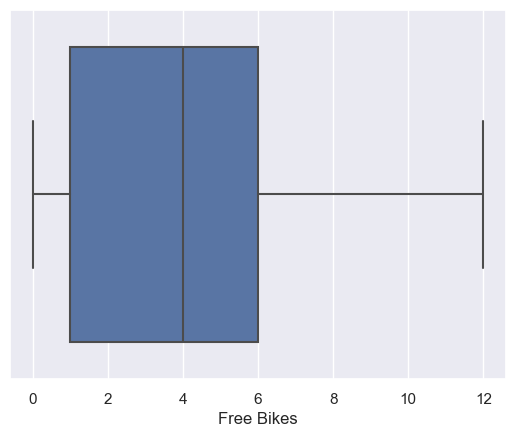

In [237]:
# Below, there are some visualizations that helped me to understand the distribution of my data sample and the presence of outliers:

df_city_bikes_recife_network_sample = pd.read_csv("df_city_bikes_recife_network_sample.csv")

sns.boxplot(x=df_city_bikes_recife_network_sample['Free Bikes'])   

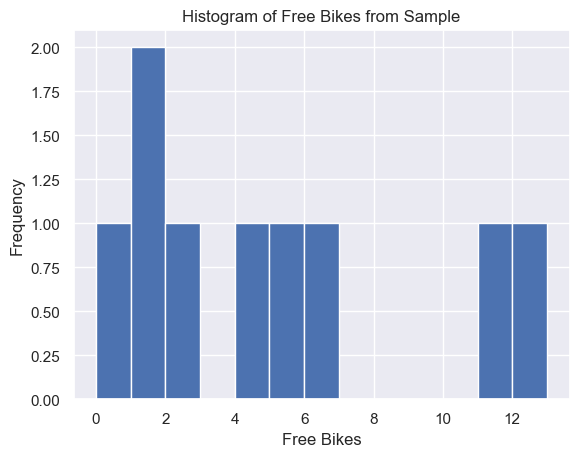

In [238]:
free_bikes_variable_sample = df_city_bikes_recife_network_sample['Free Bikes']

plt.hist(free_bikes_variable_sample, bins=range(min(free_bikes_variable_sample), max(free_bikes_variable_sample) + 2, 1))

plt.xlabel('Free Bikes')
plt.ylabel('Frequency')
plt.title('Histogram of Free Bikes from Sample')
         
plt.show()


As you can see, the first is a *boxplot* and the second is a *histogram*. They represent the 9 city bike stations found in the city of *Recife*, Brazil, which were extracted from the object *city bikes network*. They represent the whole stations population (initially, our data frame had 90 stations in total), but the graphs above represent only our sample (9 stations). Since we did a sample to do our analysis, those graphs show up only the 10% of the stations population. To compare the visualization of our *sample* with the one from our *population*, please see the graphs below:


<AxesSubplot: xlabel='Free Bikes'>

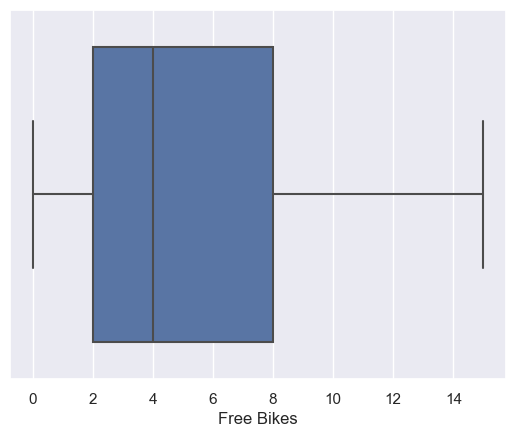

In [239]:
df_city_bikes_recife_network_population = pd.read_csv("df_city_bikes_recife_network_population.csv")

sns.boxplot(x=df_city_bikes_recife_network_population['Free Bikes'])

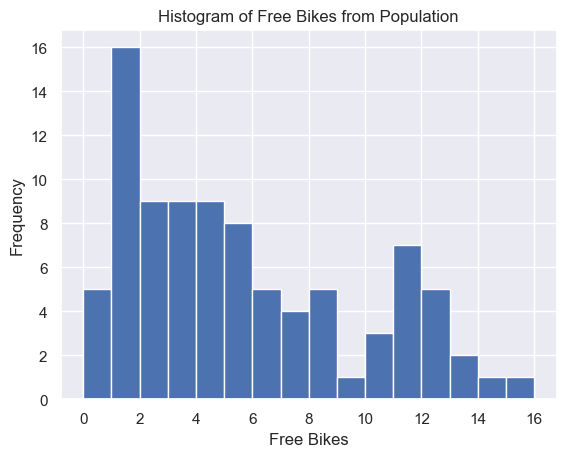

In [240]:
free_bikes_variable_population = df_city_bikes_recife_network_population['Free Bikes']

plt.hist(free_bikes_variable_population, bins=range(min(free_bikes_variable_population), max(free_bikes_variable_population) + 2, 1))

plt.xlabel('Free Bikes')
plt.ylabel('Frequency')
plt.title('Histogram of Free Bikes from Population')
plt.show()


Both the population of the city bikes stations and the sample pin point that the center of our free bikes distribution is mostly found between the range of 2 to 6. Although this is is not a normal distribution (doesn't follow quite right the bell shape), both graphs show that the average amount of free bikes available to our users is in a similar range, whereas the other stations of this population, at the right corner of our graph, which offer a higher number of free bikes, might be considered outliers (from viewing the boxplot above). More about this topic is going to be covered later.  

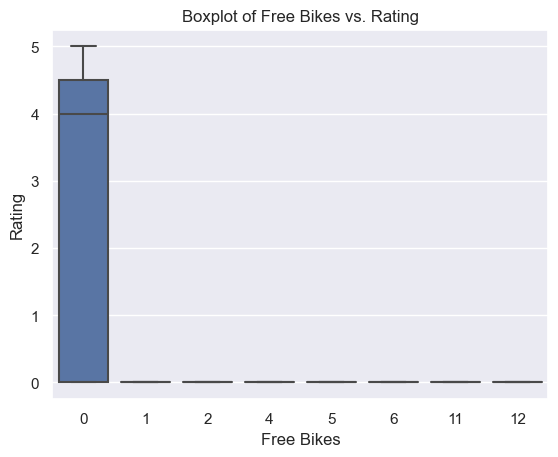

In [242]:
# Now, let's continue working with our sample. To make sure that our analysis is being done accordinglly with our theorethical approach and our hypothesis, let's add another variable to our analysis.
# As another variables, let's add the parameters of rating and review from the area that the POIs were found:

import seaborn as sns

sns.boxplot(x=df_city_bikes_recife_network_with_fsq_and_yelp['Free Bikes'], y=df_city_bikes_recife_network_with_fsq_and_yelp['Rating'])

plt.xlabel('Free Bikes')
plt.ylabel('Rating')
plt.title('Boxplot of Free Bikes vs. Rating')

plt.show()

It seems that the stations which have less amount of "free bikes" available to be rent are the ones with a higher number of ratings given by the POIs concentred in the area. This might explain why no more bikes are available in the area as more people will be circulating around visiting those places of interest. Therefore, let's try one more visualization before exporting our database:


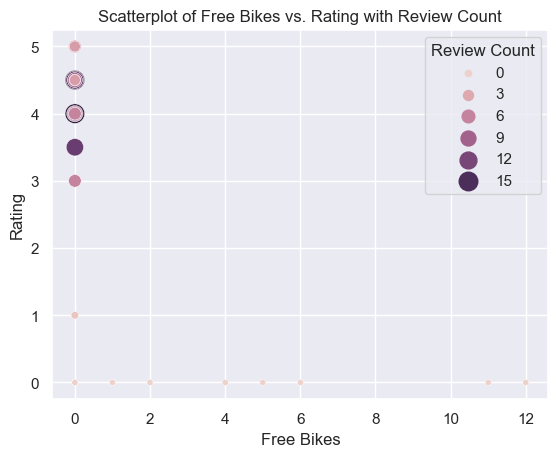

In [243]:
# Here, this scatterplot shows the relationship between free bikes, rating and review count:

sns.scatterplot(x=df_city_bikes_recife_network_with_fsq_and_yelp['Free Bikes'], y=df_city_bikes_recife_network_with_fsq_and_yelp['Rating'], size=df_city_bikes_recife_network_with_fsq_and_yelp['Review Count'], sizes=(20, 200), hue=df_city_bikes_recife_network_with_fsq_and_yelp['Review Count'])

plt.xlabel('Free Bikes')
plt.ylabel('Rating')
plt.title('Scatterplot of Free Bikes vs. Rating with Review Count')
plt.show()


In this plot, the color of each dot indicates the approximate amount of places with rating between 3 to 4 (this is the range) in related to the free bikes available to be rented in a station. The x-axis is labeled as 'Free Bikes' and y-axis as 'Rating'. As well, the color bar on the right of the graph with the label 'Review' is added to the plot to give us another layer of variable in our analysis. 
This graph also shows to us that where there are fewer bikes available to be rented there are POIs with a higher number of rating and reviews.

After this analysis, I found interesting to create another dataframe by two columns: latitude and longitude. Those grouping might give us another view if there is a relationship between the amount of places of interest with the number free bikes and/or empy slots by latitude and longitude in case we would need to investigate this relationshipt further.

In [265]:
# Let's open one of our first .csv files and group by lat and lon:

df_merged_city_bikes_with_pois = pd.read_csv("df_merged_city_bikes_with_pois.csv")


In [266]:
df_grouped_by_lat_and_lon = df_merged_city_bikes_with_pois.groupby(['Latitude', 'Longitude']).sum()

/var/folders/zt/gl7xtkgj7238nsqq03s_q7840000gn/T/ipykernel_38263/3758936785.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped_by_lat_and_lon = df_merged_city_bikes_with_pois.groupby(['Latitude', 'Longitude']).sum()


In [280]:
display(df_grouped_by_lat_and_lon)
df_grouped_by_lat_and_lon.shape

,,Unnamed: 0.1,Unnamed: 0,Uid,Empty Slots,Free Bikes,Last Updated,Renting Bikes,Returning Bikes,Rating,Review Count
Latitude,Longitude,,,,,,,,,,
-8.105086,-34.886842,2,2,61.0,21.0,6.0,1.663718e+09,1.0,1.0,0.0,0.0
-8.062496,-34.872956,4,4,4.0,11.0,12.0,1.663718e+09,1.0,1.0,0.0,0.0
-8.056160,-34.878349,5,5,13.0,17.0,0.0,1.663718e+09,1.0,1.0,0.0,0.0
-8.049770,-34.882830,3,3,23.0,17.0,2.0,1.663718e+09,1.0,1.0,0.0,0.0
-8.047194,-34.914150,8,8,122.0,10.0,4.0,1.663718e+09,1.0,1.0,0.0,0.0
-8.044389,-34.890618,0,0,56.0,10.0,1.0,1.663718e+09,1.0,1.0,0.0,0.0
-8.041909,-34.890879,6,6,57.0,5.0,5.0,1.663718e+09,1.0,1.0,0.0,0.0
-8.029370,-34.906410,7,7,116.0,3.0,11.0,1.663718e+09,1.0,1.0,0.0,0.0
-8.002349,-34.839632,1,1,75.0,13.0,1.0,1.663718e+09,1.0,1.0,0.0,0.0


(9, 10)

In [283]:
df_grouped_by_lat_and_lon.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=False)

,,Uid,Empty Slots,Free Bikes,Last Updated,Renting Bikes,Returning Bikes,Rating,Review Count
Latitude,Longitude,,,,,,,,
-8.105086,-34.886842,61.0,21.0,6.0,1.663718e+09,1.0,1.0,0.0,0.0
-8.062496,-34.872956,4.0,11.0,12.0,1.663718e+09,1.0,1.0,0.0,0.0
-8.056160,-34.878349,13.0,17.0,0.0,1.663718e+09,1.0,1.0,0.0,0.0
-8.049770,-34.882830,23.0,17.0,2.0,1.663718e+09,1.0,1.0,0.0,0.0
-8.047194,-34.914150,122.0,10.0,4.0,1.663718e+09,1.0,1.0,0.0,0.0
-8.044389,-34.890618,56.0,10.0,1.0,1.663718e+09,1.0,1.0,0.0,0.0
-8.041909,-34.890879,57.0,5.0,5.0,1.663718e+09,1.0,1.0,0.0,0.0
-8.029370,-34.906410,116.0,3.0,11.0,1.663718e+09,1.0,1.0,0.0,0.0
-8.002349,-34.839632,75.0,13.0,1.0,1.663718e+09,1.0,1.0,0.0,0.0


In [285]:
df_grouped_by_lat_and_lon.to_csv('df_grouped_by_lat_and_lon.csv', index=True)

# Database

#### Task 1: Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [287]:
# First, let's connect to SQLite with Python:

import sqlite3

from sqlite3 import Error

def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

In [306]:
path = "city_bikes_recife_network_sample_db.sqlite"
connection = create_connection(path)

Connection to SQLite DB successful


In [307]:
# Second, let's create a function called "execute_query" which takes 2 arguments (the concetion and the path).
# This function is going to use a method called "cursor.exectute" which takes one argument (the query) to execute the queries in our database.

def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query executed successfully")
    except Error as e:
        print(f"The error '{e}' occurred")
        

In [308]:
# Now, let's create our tables.
# Obs.: the query is a string that is going to be used now to create the tables.

create_city_bikes_recife_network_sample = """
CREATE TABLE IF NOT EXISTS city_bikes_recife_network_sample (
  id INTEGER PRIMARY KEY AUTOINCREMENT,
  station_uid INTEGER,
  station_name TEXT NOT NULL,
  address TEXT NOT NULL,
  empty_slots INTEGER,
  free_bikes INTEGER,
  renting_bikes INTEGER,
  latitude FLOAT,
  longitude FLOAT
);
"""
execute_query(connection, create_city_bikes_recife_network_sample)

Query executed successfully


In [309]:
# Now, let's populate our table "city_bikes_recife_network_sample):

create_city_bikes_recife_network_sample = """
INSERT INTO
  city_bikes_recife_network_sample (station_uid, station_name, address, empty_slots, free_bikes, renting_bikes, latitude, longitude) 
VALUES
  (56, "Station Bernardino Soares da Silva", "Rua Bernardino Soares da Silva", 10, 1, 1, -8.04438900000001, -34.890618),
  (75, "Station Ministro Marcos Freire", "Alberto Lundgren", 13, 1, 1, -8.00234899999999, -34.839632),
  (61, "Station Boa Viagem", "Segundo Jardim", 21, 6, 1, -8.10508599999999, -34.886842),
  (23, "Station Praça do Campo", "SESC Santo Amaro", 17, 2, 1, -8.04977, -34.88283),
  (4, "Station Rio Branco", "Boulevard Rio Branco", 11, 12, 1, -8.062496, -34.872956),
  (13, "Station Mário Melo", "Tortura Nunca Mais", 17, 0, 1, -8.05615999999999, -34.878349), 
  (57, "Station Alfredo de Medeiros", "Rua Alfredo de Medeiros", 5, 5, 1, -8.04190899999999, -34.890879),  
  (116, "Station Agamenom Magalhães", "Hospital Agamenom Magalhães", 3, 11, 1, -8.02937, -34.90641), 
  (122, "Station Praça da Torre", "Praça da Torre", 10, 4, 1, -8.047194, -34.91415);  
"""

execute_query(connection, create_city_bikes_recife_network_sample)  

Query executed successfully


In [310]:
# Then, let's create our second table:

create_city_bikes_grouped_by_lat_and_lon = """
CREATE TABLE IF NOT EXISTS city_bikes_with_pois_grouped_by_lat_and_lon (
  id INTEGER PRIMARY KEY AUTOINCREMENT, 
  latitude FLOAT,
  longitude FLOAT,
  empty_slots INTEGER, 
  free_bikes INTEGER, 
  renting_bikes INTEGER, 
  returning_bikes INTEGER,
  rating FLOAT,
  review_count INTEGER,
  FOREIGN KEY (id) REFERENCES city_bikes_recife_network_sample (id)
);
"""

execute_query(connection, create_city_bikes_grouped_by_lat_and_lon)

Query executed successfully


In [311]:
# Let's populate our table "city_bikes_grouped_by_lat_and_lon":

create_city_bikes_grouped_by_lat_and_lon = """
INSERT INTO 
  city_bikes_with_pois_grouped_by_lat_and_lon (latitude, longitude, empty_slots, free_bikes, renting_bikes, returning_bikes, rating, review_count)
VALUES
  (-8.105623,-34.88991,0,0,0,0,364.5,243),
  (-8.10508599999999,-34.886842,21,6,1,1,0.0,0),
  (-8.103678,-34.889167,0,0,0,0,364.5,1377),
  (-8.098265,-34.884039,0,0,0,0,324.0,810),
  (-8.097882,-34.8847,0,0,0,0,405.0,243),
  (-8.062496,-34.872956,11,12,1,1,0.0,0),
  (-8.062421,-34.871131,0,0,0,0,405.0,324),
  (-8.061447,-34.871606,0,0,0,0,1458.0,2268),
  (-8.05615999999999,-34.878349,17,0,1,1,0.0,0),
  (-8.04977,-34.88283,17,2,1,1,0.0,0),
  (-8.047569,-34.897101,0,0,0,0,1458.0,2916),
  (-8.047194,-34.91415,10,4,1,1,0.0,0),
  (-8.045248,-34.89303,0,0,0,0,729.0,648),
  (-8.04438900000001,-34.890618,10,1,1,1,0.0,0),
  (-8.04190899999999,-34.890879,5,5,1,1,0.0,0),
  (-8.040998,-34.916865,0,0,0,0,405.0,324),
  (-8.03475,-34.91197,0,0,0,0,324.0,567),
  (-8.02937,-34.90641,3,11,1,1,0.0,0),
  (-8.00234899999999,-34.839632,13,1,1,1,0.0,0); 
"""

execute_query(connection, create_city_bikes_grouped_by_lat_and_lon)  

Query executed successfully


In [333]:
# Let's create our third table:

create_city_bikes_recife_network_with_fsq_and_yelp = """
CREATE TABLE IF NOT EXISTS city_bikes_recife_network_with_fsq_and_yelp (
  id INTEGER PRIMARY KEY AUTOINCREMENT,
  station_uid INTEGER,
  station_name TEXT NOT NULL,
  empty_slots INTEGER,
  free_bikes INTEGER,
  renting_bikes INTEGER,
  returning_bikes INTEGER,
  latitude FLOAT,
  longitude FLOAT,
  rating FLOAT,
  review_count INTEGER,
  FOREIGN KEY (id) REFERENCES city_bikes_recife_network_sample (id)
);
"""

execute_query(connection, create_city_bikes_recife_network_with_fsq_and_yelp)

Query executed successfully


In [313]:
# Now, let's populate our table "city_bikes_recife_network_with_fsq_and_yelp":

city_bikes_recife_network_with_fsq_and_yelp = pd.read_csv("/Users/rafaelaqueiroz/Git-Repositories/Statistical-Modelling-Project/notebooks/df_city_bikes_recife_network_with_fsq_and_yelp.csv") 

city_bikes_recife_network_with_fsq_and_yelp.to_sql("city_bikes_recife_network_with_fsq_and_yelp", connection, if_exists='replace', index=False)


200

In [335]:
# Now, let's create our last table with only the pois obtained in a radius of 1000m of our stations from the sample:

create_fsq_and_yelp_pois_parsed_and_grouped_by_name = """
CREATE TABLE IF NOT EXISTS city_bikes_recife_network_with_fsq_and_yelp (
  id INTEGER PRIMARY KEY AUTOINCREMENT,
  pois_name TEXT NOT NULL,
  pois_distance FLOAT,
  pois_latitude FLOAT,
  pois_longitude FLOAT,
  pois_rating FLOAT,
  pois_review_count INTEGER
);
"""

execute_query(connection, create_fsq_and_yelp_pois_parsed_and_grouped_by_name)

Query executed successfully


In [336]:
# Now, let's populate our table "fsq_and_yelp_pois_parsed_and_grouped_by_name:

fsq_and_yelp_pois_parsed_and_grouped_by_name = pd.read_csv("/Users/rafaelaqueiroz/Git-Repositories/Statistical-Modelling-Project/notebooks/df_fsq_and_yelp_pois_parsed_and_grouped_by_name.csv")  

fsq_and_yelp_pois_parsed_and_grouped_by_name.to_sql("fsq_and_yelp_pois_parsed_and_grouped_by_name", connection, if_exists='replace', index=False)

191

In [314]:
# Finally, let's check if the tables were properly populated starting by our first one:

select_network_sample = "SELECT * from city_bikes_recife_network_sample"
network_sample = execute_read_query(connection, select_network_sample)

for station in network_sample:
    print(station)

(1, 56, 'Station Bernardino Soares da Silva', 'Rua Bernardino Soares da Silva', 10, 1, 1, -8.04438900000001, -34.890618)
(2, 75, 'Station Ministro Marcos Freire', 'Alberto Lundgren', 13, 1, 1, -8.00234899999999, -34.839632)
(3, 61, 'Station Boa Viagem', 'Segundo Jardim', 21, 6, 1, -8.10508599999999, -34.886842)
(4, 23, 'Station Praça do Campo', 'SESC Santo Amaro', 17, 2, 1, -8.04977, -34.88283)
(5, 4, 'Station Rio Branco', 'Boulevard Rio Branco', 11, 12, 1, -8.062496, -34.872956)
(6, 13, 'Station Mário Melo', 'Tortura Nunca Mais', 17, 0, 1, -8.05615999999999, -34.878349)
(7, 57, 'Station Alfredo de Medeiros', 'Rua Alfredo de Medeiros', 5, 5, 1, -8.04190899999999, -34.890879)
(8, 116, 'Station Agamenom Magalhães', 'Hospital Agamenom Magalhães', 3, 11, 1, -8.02937, -34.90641)
(9, 122, 'Station Praça da Torre', 'Praça da Torre', 10, 4, 1, -8.047194, -34.91415)


In [318]:
# Now, let's check the third one:

select_network_with_fsq_and_yelp = "SELECT * from city_bikes_recife_network_with_fsq_and_yelp"
network_with_fsq_and_yelp = execute_read_query(connection, select_network_with_fsq_and_yelp)

for place in network_with_fsq_and_yelp:
    print(place)

(56, '56 - R. Bernardino Soares da Silva', 10.0, 1, 1, 1, 0.0, 0.0, 0.0, 0)
(75, '75 - Alberto Lundgren', 13.0, 1, 1, 1, 0.0, 0.0, 0.0, 0)
(61, '61 - Segundo Jardim', 21.0, 6, 1, 1, 0.0, 0.0, 0.0, 0)
(23, '23 - SESC Santo Amaro', 17.0, 2, 1, 1, 0.0, 0.0, 0.0, 0)
(4, '4 - Boulevard Rio Branco', 11.0, 12, 1, 1, 0.0, 0.0, 0.0, 0)
(13, '13 - Tortura Nunca Mais', 17.0, 0, 1, 1, 0.0, 0.0, 0.0, 0)
(57, '57 - R. Alfredo de Medeiros', 5.0, 5, 1, 1, 0.0, 0.0, 0.0, 0)
(116, '85 - Hospital Agamenon Magalhães', 3.0, 11, 1, 1, 0.0, 0.0, 0.0, 0)
(122, '45 - Praça da Torre', 10.0, 4, 1, 1, 0.0, 0.0, 0.0, 0)
(0, 'Academia Corpore', 0.0, 0, 0, 0, -8.049831, -34.914409, 0.0, 0)
(0, 'Altar Cozinha Ancestral', 0.0, 0, 0, 0, -8.046033, -34.881433, 0.0, 0)
(0, 'Açaí', 0.0, 0, 0, 0, -8.051654, -34.887046, 0.0, 0)
(0, 'Baillar Escola de Dança', 0.0, 0, 0, 0, -8.04755, -34.888216, 0.0, 0)
(0, 'Bar do Neno', 0.0, 0, 0, 0, -8.032669, -34.909412, 0.0, 0)
(0, 'Bar e Restaurante Sob Medida', 0.0, 0, 0, 0, -7.996299,

In [337]:
# Finally, let's check if the tables were properly populated:

select_pois = "SELECT * from fsq_and_yelp_pois_parsed_and_grouped_by_name"
network_pois = execute_read_query(connection, select_pois)

for poi in network_pois:
    print(poi)

('Academia Corpore', 291.0, 0.0, 0.0, -8.049831, -34.914409)
('Altar Cozinha Ancestral', 447.0, 0.0, 0.0, -8.046033, -34.881433)
('Açaí', 518.0, 0.0, 0.0, -8.051654, -34.887046)
('Baillar Escola de Dança', 644.0, 0.0, 0.0, -8.04755, -34.888216)
('Bar do Neno', 526.0, 0.0, 0.0, -8.032669, -34.909412)
('Bar e Restaurante Sob Medida', 728.0, 0.0, 0.0, -7.996299, -34.841749)
('Barbearia Trois', 829.0, 0.0, 0.0, -8.098054, -34.885245)
('Barraca do Pingo', 609.0, 0.0, 0.0, -8.100289, -34.884155)
('Bercy Village - Crepes e Saladas', 959.0, 0.0, 0.0, -8.110377, -34.893642)
('BrowBar', 333.0, 0.0, 0.0, -8.04469, -34.893629)
('Bruno Tattoo Recife', 801.0, 0.0, 0.0, -8.060975, -34.883145)
('Cacau Show', 480.0, 0.0, 0.0, -8.030182, -34.90141)
('Cafe Sao Braz', 837.0, 0.0, 0.0, -8.050643, -34.907466)
('Cafe do Mercado', 981.0, 0.0, 0.0, -8.068907, -34.879109)
('Café do Brejo', 830.0, 0.0, 0.0, -8.05473, -34.877284)
('Caixa Cultural', 186.0, 0.0, 0.0, -8.062664, -34.871315)
('Capitão Taberna', 757.0

#### Task 2: Look at the data before and after the join to validate your data.

This part of the project took me an extensive amount of time and it still not completely concluded. The data cleaning and transformation was performed very cautiously, however it seems to me that because the APIs retrieved different parameters about the POIs, it was a challenge to make connections between the data, even though I tried to approximate the search parameters of the APIs and filters (sort by popularity in *Foursquare* and sort by best match at *Yelp*). Besides that, with the data wrangling process and the amount of columns and rows obtained (in addition of the missing values, the duplicates and not-exact information about latitude/longitude), I had the impression that I would need to come back to the data to look for more insights and patterns between the 3 APIs done in the future.

At the begginning, each API retrieved a significative amount of unstructured data: 90 stations from City Bikes, 810 results from Foursquare API and 1476 from Yelp. As their data was categorized differently, when I did the merge of the data frames, part of the results retrieved had to be connected and, other part, deleted. This is the reason why I decided to maintain different dataframes (and tables in the SQLite3) so I could maintain the information as it was when requested.

For now, I would like to research if there is a relationship between the variable *free bikes* and the other ones, such as *rating* and *review count*, because the *type* or the *category* of the poi in Recife was available. So, from the EDA done in the datasets of the pois and citybikes stations, it seems that there is a relationship between the amount of bikes available to the users at the station and what is covered by the area around of the station (the quality or popularity of the places of interest by considering the rating and review count of the POIs). From what I have looked and analyzed in the datasets, there might be a relation between them, therefore this might be one of the patterns to be investigated from our final datasets as the stations with no more bikes to be rented are at the same area of POIs with a higher amount of rating and/or review counts.
